<a href="https://colab.research.google.com/github/Nipun2635/mlproject/blob/main/Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-1: Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

Step-2: Loading Dataset

In [77]:
df = pd.read_csv('/content/Reviews.csv', encoding='latin1', on_bad_lines='skip')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Step-3: Exploratory Data Analysis (EDA)

In [78]:
df.shape

(568454, 10)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [80]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [81]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


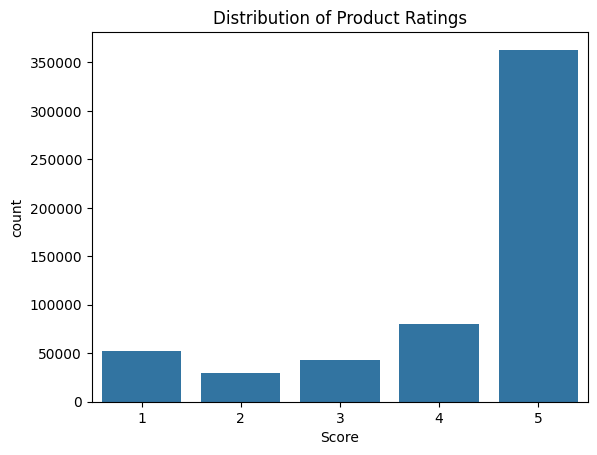

In [82]:
sns.countplot(x='Score', data=df)
plt.title('Distribution of Product Ratings')
plt.show()

Step-4: Data Preprocessing (Manually - No Pipeline)

In [83]:
# Filling missing text with empty string
df['Summary'] = df['Summary'].fillna('')
df['Text'] = df['Text'].fillna('')

In [84]:
# Dropping rows where denominator = 0 (Invalid helpfulness score)
df = df[df['HelpfulnessDenominator'] != 0]

In [85]:
# Creating new feature - helpfulnessRatio
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']

In [86]:
# Selecting features and target
X = df[['HelpfulnessNumerator','HelpfulnessDenominator','HelpfulnessRatio','Time']]
y = df['Score']

In [87]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Scaling the nueric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step-5 Building KNN Model (Manually)

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [90]:
# Prediction
y_pred = knn.predict(X_test_scaled)

In [72]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', round(mse,3))
print('R2 Score:', round(r2,3))

Mean Squared Error: 2.355
R2 Score: -0.098


Step-6 Building by using Pipeline

In [73]:
from sklearn.pipeline import Pipeline

In [74]:
knn_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [75]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [91]:
y_pred_pipe = knn_pipeline.predict(X_test)

In [92]:
mse_pipe = mean_squared_error(y_test, y_pred_pipe)
r2_pipe = r2_score(y_test, y_pred_pipe)
print('Pipeline Mean Squared Error:', round(mse_pipe,3))
print('Pipeline R2 Score:', round(r2_pipe,3))

Pipeline Mean Squared Error: 2.355
Pipeline R2 Score: -0.098


Step-7: Comparison & Visualization

Without Pipeline -> R2: -0.098  MSE: 2.355
With Pipeline -> R2: -0.098  MSE: 2.355


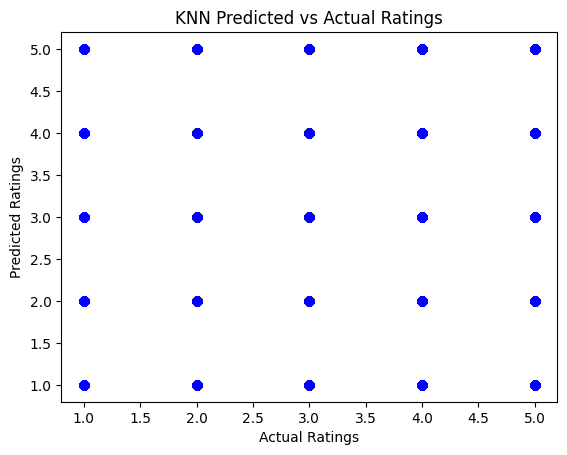

In [93]:
print("Without Pipeline -> R2:", round(r2, 3), " MSE:", round(mse, 3))
print("With Pipeline -> R2:", round(r2_pipe, 3), " MSE:", round(mse_pipe, 3))

plt.scatter(y_test, y_pred_pipe, alpha=0.5, color='blue')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("KNN Predicted vs Actual Ratings")
plt.show()

Step-8: Hyperparameter Tunning

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(knn_pipeline, param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best K:", grid.best_params_)

Best K: {'knn__n_neighbors': 9}
